## Well near a straight river

In [1]:
from ttim import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Consider a well in the middle aquifer of a three aquifer system located at $(x,y)=(0,0)$. The well starts pumping at time $t=0$ at a discharge of $Q=1000$ m$^3$/d. Aquifer properties are the shown in table 3 (same as exercise 2). A stream runs North-South along the line $x=50$. The head along the stream is fixed. 

#### Table 3 - Aquifer properties for exercise 3.
|               | $k$ (m/d) | $c$ (d) |  $S$  | $S_s$ | $z_t$ (m) | $z_b$ (m)|
|---------------| ---------:| -------:| -----:| -----:| ---------:| --------:|
|Aquifer 0      |      1    |         |   0.1 |       |   25      |        20|
|Leaky layer 1  |           |  1000   |       |0      |   20      |        18|
|Aquifer 1      |     20    |         |       |0.0001 |   18      |        10|
|Leaky layer 2  |           |  2000   |       |0      |   10      |         8|
|Aquifer 2      |      2    |         |       |0.0001 |    8      |         0|

#### Exercise 3a
Model a 1000 m long section of the stream using 12 linesinks with $y$-endpoints at [-500,-300,-200,-100,-50,0,50,100,200,300,500]. Create a cross-section of the head along $y=0$ from $x=-200$ to $x=200$ in all 3 layers.

self.Neq  11
solution complete


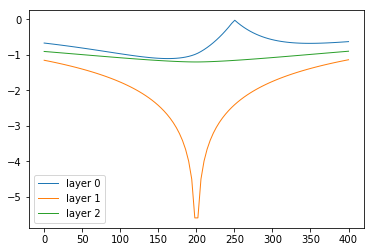

In [2]:
ml = ModelMaq(kaq=[1, 20, 2], z=[25, 20, 18, 10, 8, 0], c=[1000, 2000],
              Saq=[0.1, 1e-4, 1e-4], Sll=[0, 0], phreatictop=True,
              tmin=0.1, tmax=1000, M=20)
w = Well(ml, xw=0, yw=0, rw=0.2, tsandQ=[(0, 1000)], layers=1, label='well 1')
yls = [-500, -300, -200, -100, -50, 0, 50, 100, 200, 300, 500]
xls = 50 * np.ones(len(yls))
ls1 = HeadLineSinkString(ml, list(zip(xls, yls)), tsandh='fixed', layers=0, label='river')
ml.solve()
ml.xsection(x1=-200, x2=200, npoints=100, t=100, layers=[0, 1, 2]) 

#### Exercise 3b
Compute the discharge of the stream section (the stream depletion) as a function of time from $t=0.1$ till $t=1000$ days.

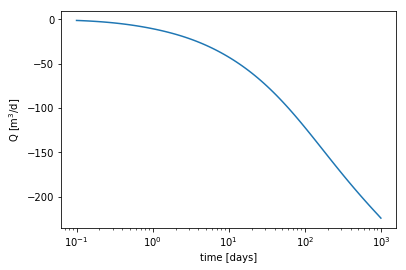

In [3]:
t = np.logspace(-1, 3, 100)
Q = ls1.discharge(t)
plt.semilogx(t, Q[0])
plt.ylabel('Q [m$^3$/d]')
plt.xlabel('time [days]');

#### Exercise 3c
Make a contour plot of each layer after 100 days of pumping. Use 20 grid points in each direction (this may take a little time).

//anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


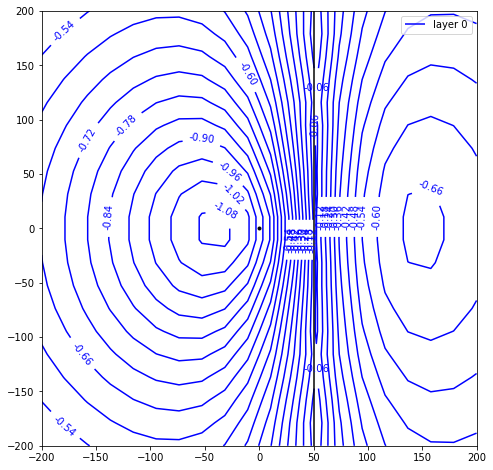

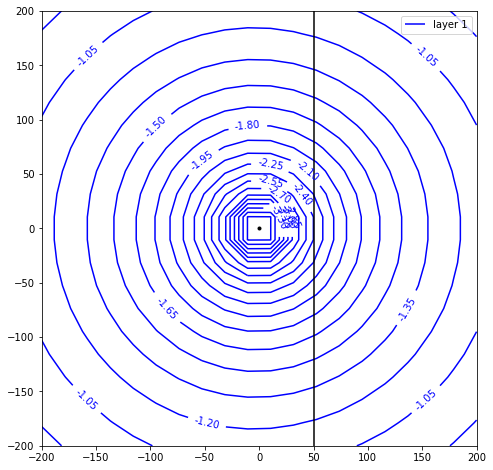

In [4]:
ml.contour(win=[-200, 200, -200, 200], ngr=[20, 20], t=100, layers=0,
           levels=20, color='b', labels='True', decimals=2, figsize=(8, 8))
ml.contour(win=[-200, 200, -200, 200], ngr=[20, 20], t=100, layers=1,
           levels=20, color='b', labels='True', decimals=2, figsize=(8, 8))

#### Exercise 3d
The discharge of the well is $Q=1000$ m$^3$/d for 100 days every summer. Compute the stream depletion for a five year period.

self.Neq  11
solution complete


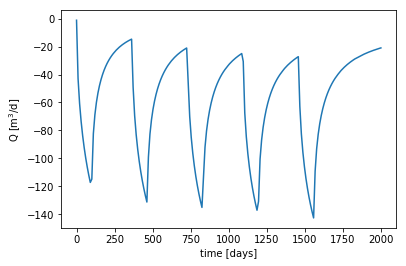

In [5]:
ml = ModelMaq(kaq=[1, 20, 2], z=[25, 20, 18, 10, 8, 0], c=[1000, 2000],
              Saq=[0.1, 1e-4, 1e-4], Sll=[0, 0], phreatictop=True,
              tmin=0.1, tmax=2000, M=20)
tsandQ=[(0, 1000), (100, 0), (365, 1000), (465, 0), 
        (730, 1000), (830, 0), (1095, 1000), (1195, 0),
        (1460, 1000), (1560, 0)]
w = Well(ml, xw=0, yw=0, rw=0.2, tsandQ=tsandQ, layers=1, label='well 1')
yls = [-500, -300, -200, -100, -50, 0, 50, 100, 200, 300, 500]
xls = 50 * np.ones(len(yls))
ls1 = HeadLineSinkString(ml, list(zip(xls, yls)), tsandh='fixed', layers=0, label='river')
ml.solve()

t = np.linspace(0.1, 2000, 200)
Q = ls1.discharge(t)
plt.plot(t, Q[0])
plt.ylabel('Q [m$^3$/d]')
plt.xlabel('time [days]');